# Regularization with Ridge Regression on Energy Efficiency Dataset

**INTRODUCTION**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_excel("ENB2012_data.xlsx")

In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [9]:
X=df.iloc[:,0:-1]
y=df['Y1']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [11]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
192,0.98,514.5,294.0,110.25,7.0,2,0.10,4,24.38
445,0.82,612.5,318.5,147.00,7.0,3,0.25,4,24.96
573,0.62,808.5,367.5,220.50,3.5,3,0.40,1,17.17
233,0.64,784.0,343.0,220.50,3.5,3,0.10,4,15.19
133,0.66,759.5,318.5,220.50,3.5,3,0.10,2,11.42
...,...,...,...,...,...,...,...,...,...
742,0.76,661.5,416.5,122.50,7.0,4,0.40,5,39.31
528,0.98,514.5,294.0,110.25,7.0,2,0.40,1,32.26
74,0.74,686.0,245.0,220.50,3.5,4,0.10,1,10.36
176,0.69,735.0,294.0,220.50,3.5,2,0.10,3,11.22


In [12]:
X_test

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
524,0.62,808.5,367.5,220.5,3.5,2,0.25,5,13.68
275,0.69,735.0,294.0,220.5,3.5,5,0.10,5,11.16
587,0.86,588.0,294.0,147.0,7.0,5,0.40,2,31.64
356,0.76,661.5,416.5,122.5,7.0,2,0.25,2,36.95
710,0.66,759.5,318.5,220.5,3.5,4,0.40,4,15.09
...,...,...,...,...,...,...,...,...,...
411,0.74,686.0,245.0,220.5,3.5,5,0.25,3,11.69
111,0.82,612.5,318.5,147.0,7.0,5,0.10,2,22.79
539,0.86,588.0,294.0,147.0,7.0,5,0.40,1,31.29
570,0.64,784.0,343.0,220.5,3.5,4,0.40,1,19.48


In [13]:
y_train

192    24.38
445    24.96
573    17.17
233    15.19
133    11.42
       ...  
742    39.31
528    32.26
74     10.36
176    11.22
338    28.18
Name: Y1, Length: 614, dtype: float64

In [16]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [18]:
y_pred=model.predict(X_test_scaled)

In [21]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Ridge Regression Results")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


Ridge Regression Results
R² Score: 1.000
RMSE: 0.050


In [24]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Intercept':model.intercept_
})
print("\n Coefficients:")
print(coefficients)


 Coefficients:
  Feature  Coefficient  Intercept
0      X1    -0.099404  22.356085
1      X2    -0.052032  22.356085
2      X3     0.017998  22.356085
3      X4    -0.059280  22.356085
4      X5     0.139010  22.356085
5      X6    -0.001262  22.356085
6      X7     0.048939  22.356085
7      X8     0.003708  22.356085
8      Y1     9.994682  22.356085


In [25]:
alphas = [0.01, 0.1, 1, 10, 100]
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    print(f"Alpha={a:<5} | R²={r2_score(y_test, y_pred):.3f} | RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")


Alpha=0.01  | R²=1.000 | RMSE=0.001
Alpha=0.1   | R²=1.000 | RMSE=0.005
Alpha=1     | R²=1.000 | RMSE=0.050
Alpha=10    | R²=0.998 | RMSE=0.391
Alpha=100   | R²=0.974 | RMSE=1.555


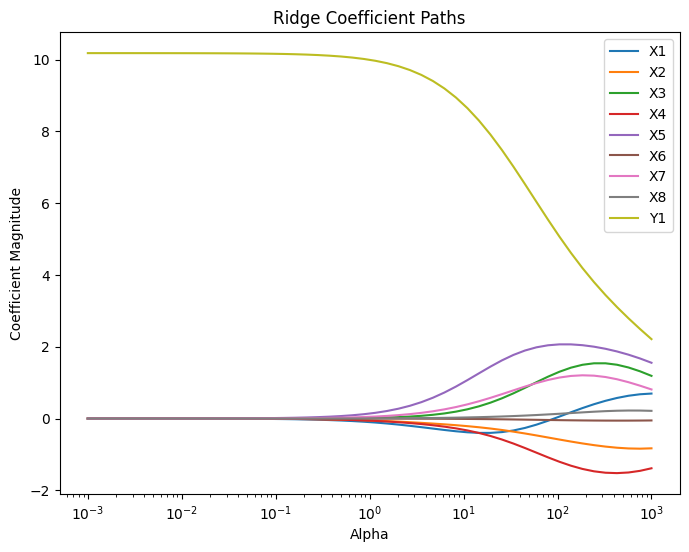

In [26]:
coefs = []
alphas = np.logspace(-3, 3, 50)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(8,6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Coefficient Paths')
plt.legend(X.columns, loc='best')
plt.show()

**CONCLUSION**